# Notes

##### Setting up Prometheus + Grafana to monitor CPU and system metrics is an excellent next step for a DevOps engineer. Since you don’t have them set up yet, I’ll walk you through a simple step-by-step guide to get everything working locally on the system.

## Prometheus + Grafana + Node Exporter
Here’s a simple explanation of each component and how they work together:

🔹 1. Node Exporter

What it is: A lightweight agent you run on your Linux system.

Purpose: It collects system-level metrics, like:

CPU usage

Memory

Disk

Network

Load average

Exports metrics in Prometheus format at http://localhost:9100/metrics

👉 Think of it as a sensor.


🔹 2. Prometheus

What it is: A metrics collector and time-series database.

Purpose:

Scrapes metrics from Node Exporter every 15s (or as configured).

Stores time-series data

Supports powerful PromQL queries for analysis and alerting.

👉 Think of it as a brain that collects and analyzes data.


🔹 3. Grafana

What it is: A visual dashboard tool.

Purpose:

Connects to Prometheus (as a data source)

Helps you visualize metrics in beautiful charts, tables, and alerts

Provides ready-made dashboards for Node Exporter

👉 Think of it as the face of your monitoring system.

🧠 How They Work Together:
lua
Copy
Edit
   +------------------+          +------------------+          +--------------+
   |  Node Exporter   | ───────► |    Prometheus    | ───────► |   Grafana    |
   |  (9100 metrics)  |          | (scrapes data)   |          | (shows graphs)|
   +------------------+          +------------------+          +--------------+



✅ Example Use Case:
Let’s say your system is slow. You want to know:

Is it CPU?

Or RAM?

Or disk?


Using this stack:

Node Exporter will expose all system metrics

Prometheus will collect and store it

Grafana will display it in a dashboard to help spot the problem instantly


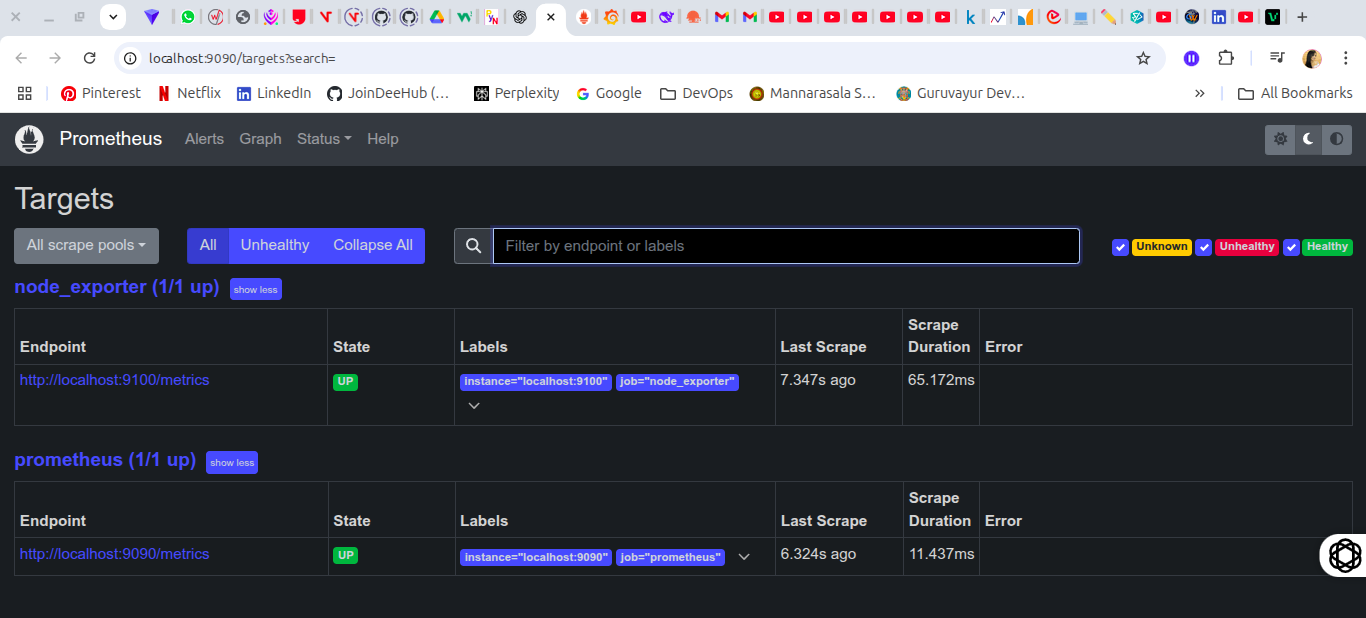

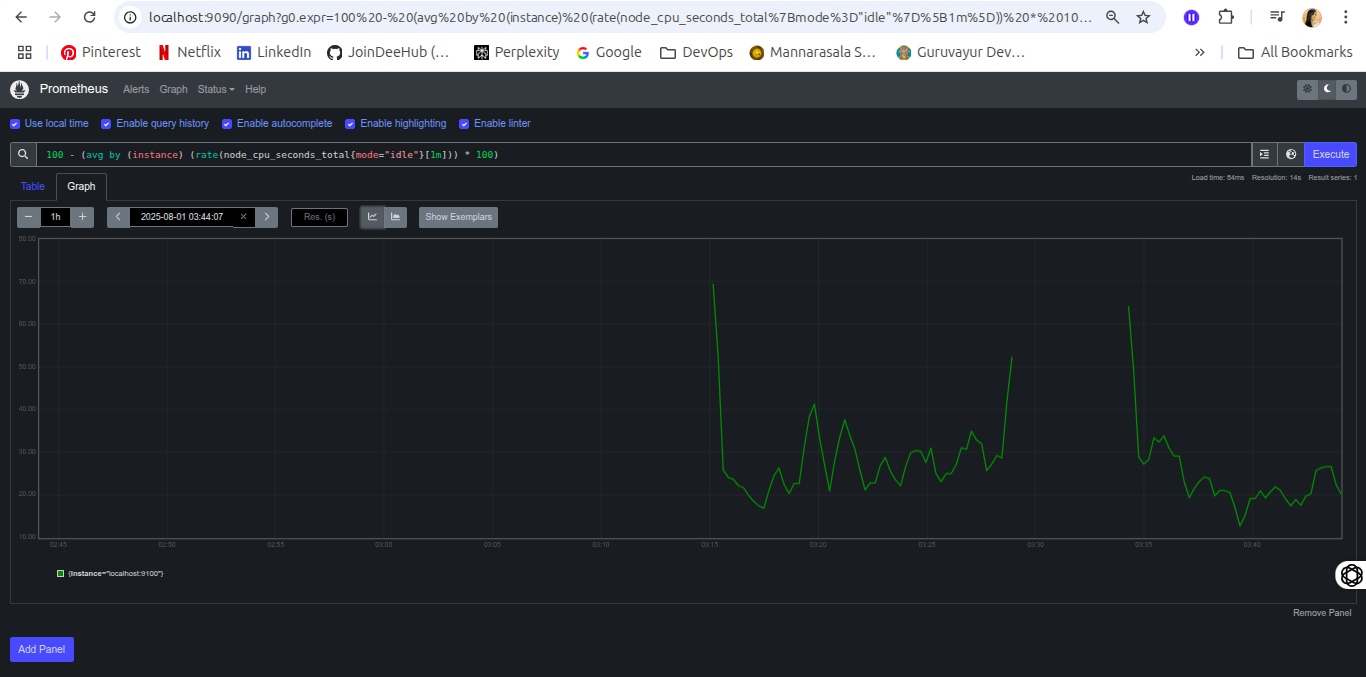

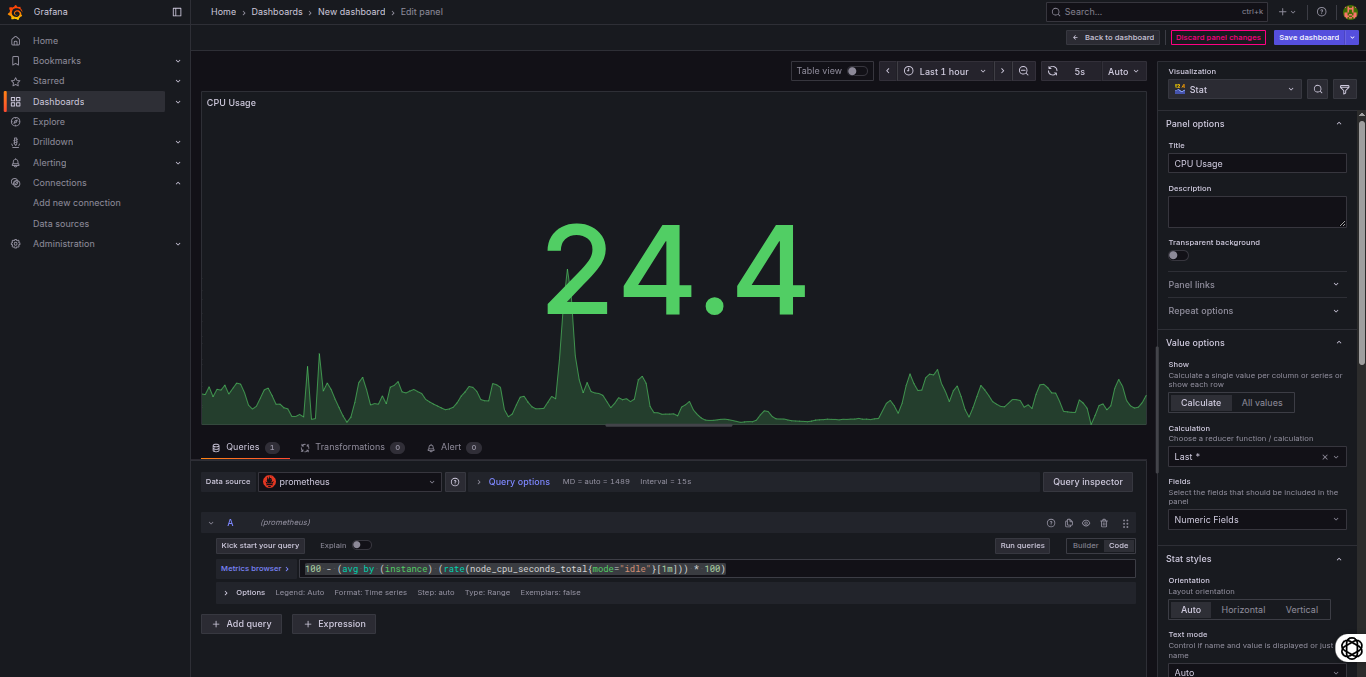

# Run the Python script for CPU usage :


systemctl status node_exporter
systemctl status prometheus
systemctl status grafana-server

should see it as active (running).

Confirm it's working
Visit: http://localhost:9100/metrics in your browser.

Or curl:   curl http://localhost:9100/metrics


# http://localhost:9090/targets



🚀 Goal:
✅ Install Prometheus and Node Exporter to collect system metrics.

✅ Install Grafana to visualize CPU usage and more.

✅ Optionally: Push custom Python metrics to Prometheus.

🖥️ Step 1: Install Prometheus (locally)
🔹 1. Download Prometheus
Go to https://prometheus.io/download
Choose your OS → Download the latest release (e.g., prometheus-*.tar.gz)




# Example for Linux:
wget https://github.com/prometheus/prometheus/releases/download/v2.52.0/prometheus-2.52.0.linux-amd64.tar.gz
tar -xvzf prometheus-*.tar.gz
cd prometheus-2.52.0.linux-amd64
🔹 2. Start Prometheus



./prometheus --config.file=prometheus.yml
Prometheus will be accessible at:
👉 http://localhost:9090

🖥️ Step 2: Install Node Exporter (to collect system metrics)
🔹 1. Download Node Exporter



wget https://github.com/prometheus/node_exporter/releases/download/v1.8.1/node_exporter-1.8.1.linux-amd64.tar.gz
tar -xvzf node_exporter-*.tar.gz
cd node_exporter-1.8.1.linux-amd64
🔹 2. Run Node Exporter



./node_exporter
It will start on port 9100

Test:
👉 http://localhost:9100/metrics

🛠️ Step 3: Configure Prometheus to Scrape Node Exporter
Open prometheus.yml and add:

yaml


scrape_configs:
  - job_name: 'prometheus'
    static_configs:
      - targets: ['localhost:9090']

  - job_name: 'node_exporter'
    static_configs:
      - targets: ['localhost:9100']
Then restart Prometheus:




./prometheus --config.file=prometheus.yml

📊 Step 4: Install Grafana
🔹 1. Install Grafana (on Linux):



# Debian/Ubuntu
sudo apt install -y apt-transport-https software-properties-common wget
wget -q -O - https://packages.grafana.com/gpg.key | sudo apt-key add -
echo "deb https://packages.grafana.com/oss/deb stable main" | sudo tee /etc/apt/sources.list.d/grafana.list
sudo apt update
sudo apt install grafana -y
🔹 2. Start Grafana



sudo systemctl start grafana-server
sudo systemctl enable grafana-server
Grafana UI:
👉 http://localhost:3000
Username: admin
Password: admin (change on first login)

📈 Step 5: Add Prometheus as Data Source in Grafana
Open Grafana → Settings > Data Sources

Add Prometheus

URL: http://localhost:9090

Save & Test ✅



📊 Step 6: Create Dashboard for CPU Usage
Go to Dashboards > New Dashboard

Add a panel

Use query like:

promql

100 - (avg by (instance) (rate(node_cpu_seconds_total{mode="idle"}[1m])) * 100)


Title it “CPU Usage”

Choose Graph > Line

Save the dashboard




✅ Final Setup Summary
Tool	Purpose	Port
Prometheus	Time-series database	9090
Node Exporter	Collects system metrics	9100
Grafana	Visualizes metrics from Prometheus	3000



Push Custom Python Metrics to Prometheus
You can expose your own Python metrics like CPU usage using the prometheus_client:




pip install prometheus_client

### Set up Prometheus as a systemd service (recommended)


Here’s how to do it step-by-step:

✅ 1. Move Prometheus binaries



sudo cp prometheus promtool /usr/local/bin/



✅ 2. Create Prometheus directories



sudo mkdir -p /etc/prometheus /var/lib/prometheus
sudo cp -r consoles/ console_libraries/ /etc/prometheus/
sudo cp prometheus.yml /etc/prometheus/



✅ 3. Create a Prometheus user



sudo useradd --no-create-home --shell /bin/false prometheus
Set ownership:




sudo chown -R prometheus:prometheus /etc/prometheus /var/lib/prometheus
sudo chown prometheus:prometheus /usr/local/bin/prometheus /usr/local/bin/promtool


✅ 4. Create systemd service file
Create file:




sudo nano /etc/systemd/system/prometheus.service
Paste:

ini


[Unit]
Description=Prometheus
Wants=network-online.target
After=network-online.target

[Service]
User=prometheus
Group=prometheus
Type=simple
ExecStart=/usr/local/bin/prometheus \
  --config.file=/etc/prometheus/prometheus.yml \
  --storage.tsdb.path=/var/lib/prometheus/ \
  --web.console.templates=/etc/prometheus/consoles \
  --web.console.libraries=/etc/prometheus/console_libraries

[Install]
WantedBy=multi-user.target
Save and exit (Ctrl+O, Enter, Ctrl+X).

✅ 5. Start and enable Prometheus



sudo systemctl daemon-reexec
sudo systemctl daemon-reload
sudo systemctl enable prometheus
sudo systemctl start prometheus
🔍 6. Verify



systemctl status prometheus
Then visit → http://localhost:9090



t-shoot:

✅ Step 1: Confirm Services Are Running
Run:




sudo systemctl status prometheus
sudo systemctl status grafana-server
If either is inactive or failed, start it:




sudo systemctl start prometheus
sudo systemctl start grafana-server
And enable on boot:




sudo systemctl enable prometheus
sudo systemctl enable grafana-server
✅ Step 2: Check Listening Ports
Run:




sudo lsof -i -P -n | grep LISTEN
You should see something like:

Prometheus → :9090

Grafana → :3000

If not, the services aren't bound to those ports.

✅ Step 3: Check Logs for Errors



journalctl -u prometheus --no-pager --since "5 minutes ago"
journalctl -u grafana-server --no-pager --since "5 minutes ago"
Look for anything like:

Port already in use

Config file issues

Permission errors

✅ Step 4: Validate Prometheus Config
Run:




prometheus --config.file=/etc/prometheus/prometheus.yml
If there's a YAML error in your prometheus.yml, this command will show it.

✅ Step 5: Check Firewall (if enabled)
If ufw is running, check rules:




sudo ufw status
If necessary, allow the ports:




sudo ufw allow 9090
sudo ufw allow 3000
✅ Step 6: Retry Access
Prometheus: http://localhost:9090

Grafana: http://localhost:3000

